# Lista 3

In [ ]:
import ctypes # tablice niskopoziomowe
import matplotlib.pyplot as plt
import time
import numpy as np

In [48]:
class Stack:
    def __init__(self):
        self._data = [] #nowy pusty stos

    def __len__(self):
        return len(self._data)

    def is_empty(self):
        return len(self._data)==0

    def push(self,e):
        self._data.append(e)

    def top(self):
        if self.is_empty():
            raise 'Stack is empty'
        return self._data[-1]

    def pop(self):
        if self.is_empty():
            raise 'Stack is empty'
        return self._data.pop()

### Zadanie 1

In [69]:
class DynamicArray:

   def __init__(self):
      self._n = 0 # liczba elementów
      self._capacity = 1 # rozmiar tablicy
      self._A = self._make_array(self._capacity) # właściwa tablica

   def __len__(self):
      return self._n

   def __getitem__(self,k):
      if not 0 <= k < self._n:
         raise IndexError('invalid index')
      return self._A[k]

   def append(self,obj):
      if self._n == self._capacity:
         self._resize(2*self._capacity)
      self._A[self._n] = obj
      self._n += 1

   def _resize(self,c):
      B = self._make_array(c)
      for k in range(self._n):
         B[k] = self._A[k]
      self._A = B
      self._capacity = c

   def _make_array(self,c):
      return (c*ctypes.py_object)()

   def insert(self, k, value):
      if not 0 <= k <= self._n:
         raise IndexError('invalid index')
      if self._n == self._capacity:
         self._resize(2 * self._capacity)
      for i in range(self._n, k, -1):
         self._A[i] = self._A[i - 1]
      self._A[k] = value
      self._n += 1

   def remove(self, value):
      for i in range(self._n):
         if self._A[i] == value:
               for j in range(i, self._n-1):
                  self._A[j] = self._A[j+1]
               self._n -= 1
               return

   def expand(self, seq):
      if self._n + len(seq) > self._capacity:
         self._resize(2 * (self._n + len(seq)))
      for i in range(0, len(seq)):
         self._A[self._n + i] = seq[i]
      self._n += len(seq)

   def __str__(self):
      result = "|"
      for i in range(self._n):
         result += self._A[i] + "|"
      for i in range(self._n, self._capacity):
         result += " |"
      return result


a = DynamicArray()
print(a)
a.expand(['a', 'd', 'b', 'c', 'd'])
a.remove('d')
a.expand(['f', 'g', 'h', 'i'])
print(a)
a.insert(4, 'e')
print(a)

| |
|a|b|c|d|f|g|h|i| | |
|a|b|c|d|e|f|g|h|i| |


# Zadanie 2

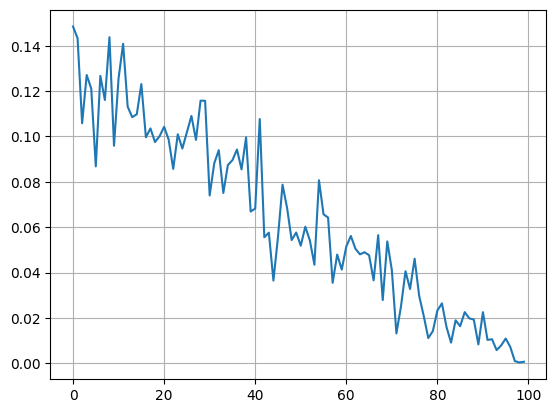

In [45]:
interval = 100000
numberOfIter = 100
lista = [0 for _ in range(interval * numberOfIter)]

def measureTime(function, list, index, N=10):
    time_sum = 0
    for _ in range(N):
        l = list.copy()
        start = time.time()
        function(l, index)
        time_sum += time.time() - start
    return time_sum

def popFunction(list, index):
    list.pop(index)


timeList = []
for i in range(0, numberOfIter * interval, interval):
    timeList.append(measureTime(popFunction, lista, i))


plt.plot([_ for _ in range(numberOfIter)], timeList)
plt.grid(True)
plt.show()
    

# Zadanie 3

In [70]:
def sumOfListOfList(list_of_list):
    result = 0
    for a in list_of_list:
        for b in a:
            result += b
    return result


print(sumOfListOfList([[1, 2, 3], [4, 5, 6], [7, 8, 9]]))

45


# Zadanie 4

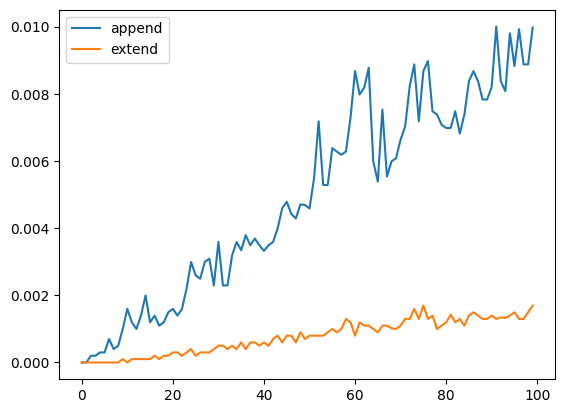

In [71]:
def testAppend(l1, l2, N):
    avg_time = 0
    for _ in range(N):
        start = time.time()
        for a in l2:
            l1.append(a)
        avg_time += time.time() - start
    return avg_time / N


def testExtend(l1, l2, N):
    avg_time = 0
    for _ in range(N):
        start = time.time()
        l1.extend(l2)
        avg_time += time.time() - start
    return avg_time / N

def experiment4():
    N = 10
    n = 100
    time_append = []
    time_extend = []
    for i in range(n):
        l2 = [0] * i * 1000
        time_append.append(testAppend([], l2, N))
        time_extend.append(testExtend([], l2, N))
    plt.plot([i for i in range(n)], time_append)
    plt.plot([i for i in range(n)], time_extend)
    plt.legend(['append', 'extend'])
    plt.show()


experiment4()

# Zadanie 5

In [73]:
class Queue:
    DEFAULT_CAPACITY = 1

    def __init__(self):
        self._data = [None]*Queue.DEFAULT_CAPACITY
        self._size = 0
        self._front = 0

    def __len__(self):
        return self._size

    def is_empty(self):
        return self._size == 0

    def first(self):
        if self.is_empty():
            raise 'Queue is empty'
        return self._data[self._front]

    def dequeue(self):
        if self.is_empty():
            raise 'Queue is empty'
        value = self._data[self._front]
        self._data[self._front] = None
        self._front = (self._front+1)%len(self._data)
        self._size -= 1
        if self._size < len(self._data) / 4:
            self._resize(2*self._size)
        return value

    def enqueue(self,e):
        if self._size == len(self._data):
            self._resize(2*len(self._data))
        avail = (self._front + self._size)%len(self._data)
        self._data[avail] = e
        self._size += 1

    def _resize(self,cap):
        old = self._data
        self._data = [None]*cap
        walk = self._front
        for k in range(self._size):
            self._data[k] = old[walk]
            walk = (1 + walk)%len(old)
        self._front = 0
    
    def capacity(self):
        return len(self._data)


queue = Queue()
for i in range(10):
    queue.enqueue(i)
for i in range(8):
    queue.dequeue()
print(queue.capacity())


6


# Zadanie 6

In [41]:
class Deque:
    DEFAULT_CAPACITY = 10

    def __init__(self):
        self._data = [None]*Deque.DEFAULT_CAPACITY
        self._size = 0
        self._first = 0
        self._last = len(self._data)-1

    def __len__(self):
        return self._size

    def is_empty(self):
        return self._size == 0

    def first(self):
        if self.is_empty():
            raise 'Queue is empty'
        return self._data[self._first]

    def last(self):
        if self.is_empy():
            raise 'Queue is empty'
        return self._data[self._last]

    def _resize(self,cap):
        old = self._data
        self._data = [None]*cap
        walk = self._first
        for k in range(self._size):
            self._data[k] = old[walk]
            walk = (1 + walk)%len(old)
        self._first = 0
        self._last = self._size - 1

    def add_first(self, element):
        if self._size == len(self._data):
            self._resize(2*len(self._data))
        self._first = (self._first - 1 + len(self._data))%len(self._data)
        self._data[self._first] = element
        self._size += 1

    def add_last(self, element):
        if self._size == len(self._data):
            self._resize(2*len(self._data))
        self._last = (self._last + 1)%len(self._data)
        self._data[self._last] = element
        self._size += 1

    def delete_first(self):
        if self.is_empty():
            raise 'Queue is empty'
        value = self._data[self._first]
        self._data[self._first] = None
        self._first = (self._first+1)%len(self._data)
        self._size -= 1
        if self._size < len(self._data) / 4:
            self._resize(2*self._size)
        return value

    def delete_last(self):
        if self.is_empty():
            raise 'Queue is empty'
        value = self._data[self._last]
        self._data[self._last] = None
        self._last = (self._last-1+len(self._data))%len(self._data)
        self._size -= 1
        if self._size < len(self._data) / 4:
            self._resize(2*self._size)
        return value

    def __str__(self):
        result = "|"
        for i in range(self._size):
            result += str(self._data[(self._first + i)%len(self._data)]) + "|"
        return result
        


queue = Deque()
for i in range(10):
    queue.add_first(3 * i)
    queue.add_last(3 * i + 1)
    queue.add_last(3 * i + 2)
    queue.delete_first()
queue.delete_last()
print(queue)

|1|2|4|5|7|8|10|11|13|14|16|17|19|20|22|23|25|26|28|


# Zadanie 7

In [67]:
def zadanie7(html):
    stack = Stack()
    isComment = False
    isTag = False
    tagName = ''
    isOpen = False
    tagNameEnded = False
    i = 0
    while i < len(html):
        if isComment:
            if html[i] == '-' and i < len(html) - 2:
                i += 1
                if html[i] == '-':
                    if html[i + 1] == '>':
                        i += 1
                        isComment = False
                i += 1
        elif isTag:
            if html[i] == '>':
                isTag = False
                if isOpen:
                    if tagName not in ['br', 'hr', 'img', 'input', 'meta', 'link'] and not tagName.upper().startswith('!DOCTYPE'):
                        stack.push(tagName)
                else:
                    if stack.is_empty():
                        return False
                    lastTagName = stack.pop()
                    if lastTagName != tagName:
                        return False
            elif not tagNameEnded:
                if html[i] not in [' ', '\t', '\n']:
                    tagName += html[i].lower()
                else:
                    tagNameEnded = True
        elif html[i] == '<':
            if i < len(html) - 3 and html[i + 1] == '!' and html[i + 2] == '-' and html[i + 3] == '-':
                isComment = True
                i += 3
            else:
                isTag = True
                tagName = ''
                tagNameEnded = False
                if i < len(html) - 1 and html[i + 1] == '/':
                    isOpen = False
                    i += 1
                else:
                    isOpen = True
        i += 1
    return stack.is_empty() and not isTag

f1 = open("HTML_sample1.txt", "r")
f2 = open("HTML_sample2.txt", "r")
f3 = open("HTML_sample3.txt", "r")
sample1 = f1.read()
sample2 = f2.read()
sample3 = f3.read()
print(zadanie7(sample1))
print(zadanie7(sample2))
print(zadanie7(sample3))

True
False
False


# Zadanie 8

In [68]:
def permutations(list):
    stack = Stack()
    stack.push([])
    n = len(list)
    
    while not stack.is_empty():
        v = stack.pop()
        
        if len(v) == n:
            yield v
        else:
            for i in range(n):
                if list[i] not in v:
                    stack.push(v + [list[i]])
            

for p in permutations([1,2,3,4]):
    print(p)

[4, 3, 2, 1]
[4, 3, 1, 2]
[4, 2, 3, 1]
[4, 2, 1, 3]
[4, 1, 3, 2]
[4, 1, 2, 3]
[3, 4, 2, 1]
[3, 4, 1, 2]
[3, 2, 4, 1]
[3, 2, 1, 4]
[3, 1, 4, 2]
[3, 1, 2, 4]
[2, 4, 3, 1]
[2, 4, 1, 3]
[2, 3, 4, 1]
[2, 3, 1, 4]
[2, 1, 4, 3]
[2, 1, 3, 4]
[1, 4, 3, 2]
[1, 4, 2, 3]
[1, 3, 4, 2]
[1, 3, 2, 4]
[1, 2, 4, 3]
[1, 2, 3, 4]


# Zadanie 9

In [65]:
class StackByQueue:
    def __init__(self):
        self._queue = Queue()

    def is_empty(self):
        return self._queue.is_empty()

    def push(self, element):
        n = len(self._queue)
        self._queue.enqueue(element)
        for _ in range(n):
            self._queue.enqueue(self._queue.dequeue())

    def pop(self):
        if self._queue.is_empty():
            raise 'Stack is empty'
        return self._queue.dequeue()


stack = StackByQueue()
stack.push(1)
stack.push(2)
print(stack.pop())
stack.push(3)
stack.push(4)
print(stack.pop())
print(stack.pop())
print(stack.pop())

2
4
3
1


# Zadanie 10

In [56]:
class QueueWithStacks:
    def __init__(self):
        self._stack1 = Stack()
        self._stack2 = Stack()

    def push(self, element):
        self._stack1.push(element)

    def pop(self):
        if not self._stack2.is_empty():
            return self._stack2.pop()
        if self._stack1.is_empty():
            raise 'Queue is empty'
        while not self._stack1.is_empty():
            self._stack2.push(self._stack1.pop())
        return self._stack2.pop()
    
    def is_empty(self):
        return self._stack2.is_empty() and self._stack1.is_empty()

queue = QueueWithStacks()
queue.push(1)
queue.push(2)
print(queue.pop())
queue.push(3)
queue.push(4)
print(queue.pop())
print(queue.pop())
print(queue.pop())

1
2
3
4
